<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#대회-시작/종료/팀병합마감일의-높은/낮은-수치-경향성-차이-이유는?" data-toc-modified-id="대회-시작/종료/팀병합마감일의-높은/낮은-수치-경향성-차이-이유는?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>대회 시작/종료/팀병합마감일의 높은/낮은 수치 경향성 차이 이유는?</a></span><ul class="toc-item"><li><span><a href="#가설-2)-대회-특성에-따라-낮게/높게-나타나는-추이가-나뉘지-않을까?" data-toc-modified-id="가설-2)-대회-특성에-따라-낮게/높게-나타나는-추이가-나뉘지-않을까?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>가설 2) 대회 특성에 따라 낮게/높게 나타나는 추이가 나뉘지 않을까?</a></span><ul class="toc-item"><li><span><a href="#period_start-날짜-기준으로-target과-join" data-toc-modified-id="period_start-날짜-기준으로-target과-join-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>period_start 날짜 기준으로 target과 join</a></span></li><li><span><a href="#대회-특성과-예측-변수-간의-상관관계-(대회-시작일-기준)" data-toc-modified-id="대회-특성과-예측-변수-간의-상관관계-(대회-시작일-기준)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>대회 특성과 예측 변수 간의 상관관계 (대회 시작일 기준)</a></span></li><li><span><a href="#가설-2-1)-대회-첫날에는-대회명,-키워드,-상금에-따라-경향이-나뉠-것" data-toc-modified-id="가설-2-1)-대회-첫날에는-대회명,-키워드,-상금에-따라-경향이-나뉠-것-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>가설 2-1) 대회 첫날에는 대회명, 키워드, 상금에 따라 경향이 나뉠 것</a></span></li><li><span><a href="#prize에-따른-target-분포-확인" data-toc-modified-id="prize에-따른-target-분포-확인-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>prize에 따른 target 분포 확인</a></span><ul class="toc-item"><li><span><a href="#prize-point-plot" data-toc-modified-id="prize-point-plot-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>prize point plot</a></span></li><li><span><a href="#prize-<=-1000" data-toc-modified-id="prize-<=-1000-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>prize &lt;= 1000</a></span></li><li><span><a href="#prize-<-1000" data-toc-modified-id="prize-<-1000-2.1.4.3"><span class="toc-item-num">2.1.4.3&nbsp;&nbsp;</span>prize &lt; 1000</a></span></li><li><span><a href="#prize-<=-500" data-toc-modified-id="prize-<=-500-2.1.4.4"><span class="toc-item-num">2.1.4.4&nbsp;&nbsp;</span>prize &lt;= 500</a></span></li><li><span><a href="#prize-<=-250" data-toc-modified-id="prize-<=-250-2.1.4.5"><span class="toc-item-num">2.1.4.5&nbsp;&nbsp;</span>prize &lt;= 250</a></span></li></ul></li><li><span><a href="#Shap-Value-with-xgboost" data-toc-modified-id="Shap-Value-with-xgboost-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Shap Value with xgboost</a></span><ul class="toc-item"><li><span><a href="#prize-변수가-target-변수에-어떤-영향력을-미치는지-확인" data-toc-modified-id="prize-변수가-target-변수에-어떤-영향력을-미치는지-확인-2.1.5.1"><span class="toc-item-num">2.1.5.1&nbsp;&nbsp;</span>prize 변수가 target 변수에 어떤 영향력을 미치는지 확인</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# plotly
import chart_studio
import chart_studio.plotly as py   # import plotly.plotly  => chart_studio.plotly 로 변경됨 
import plotly.graph_objects as go
import cufflinks as cf 
cf.go_offline(connected=True)
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# plotly login
chart_studio.tools.set_credentials_file(username='***', api_key='***')

# 변수 영향력/관계 알아보는 shapvalue를 위한 트리형 모델과 shap 라이브러리
from xgboost import XGBRegressor
import shap

# 데이터 불러오기

In [2]:
train = pd.read_csv('data/train2.csv', encoding='cp949')
train

,ds,사용자,세션,신규방문자,페이지뷰,year,month,week,holiday,period_start,period_end,merge_deadline
0,2018-09-09,281,266,73,1826,2018,9,6,0,0,0,0
1,2018-09-10,264,247,51,2092,2018,9,0,0,0,0,0
2,2018-09-11,329,310,58,1998,2018,9,1,0,0,0,0
3,2018-09-12,300,287,45,2595,2018,9,2,0,0,0,0
4,2018-09-13,378,344,50,3845,2018,9,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
817,2020-12-04,3189,3068,743,75730,2020,12,4,0,0,1,0
818,2020-12-05,2055,2019,497,47638,2020,12,5,0,0,0,0
819,2020-12-06,2119,2077,460,46914,2020,12,6,0,0,0,0
820,2020-12-07,2979,2988,753,77443,2020,12,0,0,0,0,0


In [3]:
info_compet = pd.read_csv('data/info_compet.csv', encoding='cp949')
info_compet

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
0,136.0,2018-08-14,2018-09-13,대출 상점 총 매출 예측 경진대회,Shop Total Sales Forecast,"금융 | 소상공인 신용카드 가맹점 빅데이터와 AI로 매출 예측 | 시계열, 회귀 ...",[Finance] Small Business Credit Card Merchant ...,321,5,5,850,2018-09-13,3
1,9565.0,2018-09-15,2018-10-13,병원 개/폐업 분류 예측 경진대회,hospital opening / closing classification pred...,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,[Financial] Hospital financial data and openin...,482,10,3,350,2018-10-13,3
2,17801.0,2018-10-18,2018-12-31,아파트 경매가격 예측 경진대회,Apartment Auction Price Forecast,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,[Finance] Real Estate Apartment Auction Big Da...,327,10,3,1000,2018-12-31,3
3,21265.0,2018-11-13,2019-01-31,아파트 실거래가 예측,apartment real price forecast,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,[Finance] Predictive analysis of real transact...,584,10,3,800,2019-01-31,3
4,42473.0,2018-12-25,2019-01-10,신용카드 거래 데이터 시각화,credit card transaction data visualization,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...","[Finance] Credit cards, time series, visualiza...",270,5,3,100,2019-01-10,3
5,62540.0,2019-02-08,2019-07-18,KBO 타자 OPS 예측 경진대회,KBO batter OPS modeling,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",[Sports] KBO hitter big data and AI predict OP...,354,5,3,800,2019-07-18,3
6,68346.0,2019-03-26,2019-05-20,KBO 외국인 투수 스카우팅 최적화 경진대회,KBO foreign pitcher scouting optimization,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",[Sports] Pitcher Scout Analysis using MLB data...,105,1,3,200,2019-05-20,3
7,82407.0,2019-05-06,2019-07-08,KCB 금융스타일 시각화 경진대회,KCB Financial Style Visualization Contest,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",Finance | Job offer | Analysis visualization w...,277,5,3,1000,2019-07-08,3
8,140472.0,2019-07-11,2019-10-21,상점 신용카드 매출 예측 경진대회,Store Credit Card Sales Forecast Contest,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,"[Finance, Job Offers] Small business merchant ...",652,5,15,200,NaN,3
9,196878.0,2019-10-01,2019-10-27,전력 수요량 예측 경진대회,Electric Power Demand Forecast Contest,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",[Public] Analyzing demand by power weather big...,502,4,3,600,2019-10-27,3


# 대회 시작/종료/팀병합마감일의 높은/낮은 수치 경향성 차이 이유는?
**가설**
1. 주말, 공휴일의 영향으로 낮은 수치가 나타나는 것일까?
2. 대회 특성에 따라 낮게/높게 나타나는 추이가 나뉘지 않을까?      
    - 앞서 살펴본 주말, 공휴일에 따라 경향이 완전히 분리되지 않았던, 대회 시작일
    - 대회 시작일(첫날)에는 대회명, 키워드, 상금에 따라 경향이 나뉠 것

(단, 가설 1,2에 해당되는 날이라도, 해당일에 대회가 2번이상 개최되었다면, 낮은 경향성으로 구분할 때 제외)

## 가설 2) 대회 특성에 따라 낮게/높게 나타나는 추이가 나뉘지 않을까?
- 앞서 살펴본 주말, 공휴일에 따라 경향이 완전히 분리되지 않았던, 대회 시작일에 대해 더 알아보자
- 대회 시작일 기준으로 대회 정보 join

대회 특성
- prize(상금)
- participants(참여자 수)
- max_team_member: 최대 팀 멤버
- max_file_per_day: 하루 최대 제출 횟수
- winner_show: 보여지는 위너 수
- name,keyword: 토큰화 후 단어별 count 수? or 군집화?

### period_start 날짜 기준으로 target과 join

In [4]:
# train data가 존재하는 2018-09-09 ~ 2020-12-08까지 대회 정보만 남기기
info_compet_2 = info_compet[(info_compet['period_start'] <= '2020-12-08') & (info_compet['period_start'] >= '2018-09-09')]
info_compet_2.tail(2)

,cpt_id,period_start,period_end,name,name_eng,keyword,keyword_eng,participants,max_team_member,max_file_per_day,prize,merge_deadline,winner_show
44,235673.0,2020-11-11,2020-12-09,한국어 문서 생성요약 AI 경진대회,NaN,Bflysoft | 생성 요약 | ROUGE-N,NaN,263,5,3,1000,2020-11-25,3
45,235679.0,2020-11-24,2020-12-28,국회 입법활동 빅데이터 시각화 경진대회,NaN,월간 데이콘 10 | 입법 | 시각화 | 유저평가,NaN,498,3,3,100,2020-12-15,3


In [5]:
# 필요한 데이터만 남기기
compet_period_start = info_compet_2[['period_start','prize','participants','max_team_member','max_file_per_day','winner_show','name','keyword']].copy()
compet_period_start.rename(columns={'period_start':'ds'}, inplace=True)
compet_period_start.head(2)

,ds,prize,participants,max_team_member,max_file_per_day,winner_show,name,keyword
1,2018-09-15,350,482,10,3,3,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy
2,2018-10-18,1000,327,10,3,3,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE


In [6]:
compet_period_start2 = pd.merge(compet_period_start, train[['ds','사용자','세션','신규방문자','페이지뷰']], on = 'ds', how='left')
compet_period_start2

,ds,prize,participants,max_team_member,max_file_per_day,winner_show,name,keyword,사용자,세션,신규방문자,페이지뷰
0,2018-09-15,350,482,10,3,3,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,210,202,40,1384
1,2018-10-18,1000,327,10,3,3,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,258,257,116,1394
2,2018-11-13,800,584,10,3,3,아파트 실거래가 예측,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,415,432,179,3226
3,2018-12-25,100,270,5,3,3,신용카드 거래 데이터 시각화,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...",197,183,53,5704
4,2019-02-08,800,354,5,3,3,KBO 타자 OPS 예측 경진대회,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",911,991,502,5733
5,2019-03-26,200,105,1,3,3,KBO 외국인 투수 스카우팅 최적화 경진대회,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",341,328,107,2482
6,2019-05-06,1000,277,5,3,3,KCB 금융스타일 시각화 경진대회,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",357,368,81,5052
7,2019-07-11,200,652,5,15,3,상점 신용카드 매출 예측 경진대회,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,644,658,184,11018
8,2019-10-01,600,502,4,3,3,전력 수요량 예측 경진대회,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",963,1135,360,13001
9,2019-11-11,700,923,5,10,3,퇴근시간 버스승차인원 예측 경진대회,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,1495,1531,650,19148


### 대회 특성과 예측 변수 간의 상관관계 (대회 시작일 기준)

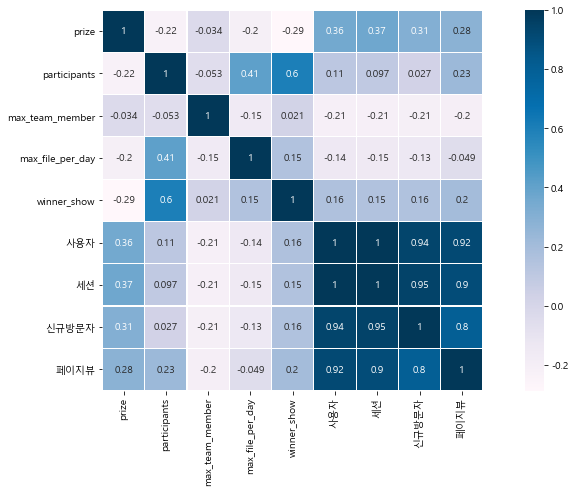

In [7]:
# 대회 시작일 기준으로 train data join 시 
plt.figure(figsize=(15, 7))

colormap = plt.cm.PuBu 
sns.heatmap(compet_period_start2.corr(), 
            linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10.0})
plt.show()

- prize는 사용자, 세션, 신규방문자, 페이지뷰 모두와 양의 상관관계를 보임
- max_team_member가 커질 수록, 4개 예측 변수는 값이 작아지는 약한 음의 상관관계가 나타남

### 가설 2-1) 대회 첫날에는 대회명, 키워드, 상금에 따라 경향이 나뉠 것

### prize에 따른 target 분포 확인

In [8]:
compet_period_start2

,ds,prize,participants,max_team_member,max_file_per_day,winner_show,name,keyword,사용자,세션,신규방문자,페이지뷰
0,2018-09-15,350,482,10,3,3,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,210,202,40,1384
1,2018-10-18,1000,327,10,3,3,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,258,257,116,1394
2,2018-11-13,800,584,10,3,3,아파트 실거래가 예측,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,415,432,179,3226
3,2018-12-25,100,270,5,3,3,신용카드 거래 데이터 시각화,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...",197,183,53,5704
4,2019-02-08,800,354,5,3,3,KBO 타자 OPS 예측 경진대회,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",911,991,502,5733
5,2019-03-26,200,105,1,3,3,KBO 외국인 투수 스카우팅 최적화 경진대회,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",341,328,107,2482
6,2019-05-06,1000,277,5,3,3,KCB 금융스타일 시각화 경진대회,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",357,368,81,5052
7,2019-07-11,200,652,5,15,3,상점 신용카드 매출 예측 경진대회,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,644,658,184,11018
8,2019-10-01,600,502,4,3,3,전력 수요량 예측 경진대회,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",963,1135,360,13001
9,2019-11-11,700,923,5,10,3,퇴근시간 버스승차인원 예측 경진대회,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,1495,1531,650,19148


#### prize point plot

In [9]:
#  marker=dict(color='#BDBDBD')
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('사용자','세션','신규방문자','페이지뷰'), horizontal_spacing=0.08, vertical_spacing=0.12
)
fig.add_trace(go.Scatter(x=compet_period_start2['prize'], y=compet_period_start2['사용자'],name="사용자",showlegend=False, mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=compet_period_start2['prize'], y=compet_period_start2['세션'],name="세션",showlegend=False, mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(x=compet_period_start2['prize'], y=compet_period_start2['신규방문자'],name="신규방문자",showlegend=False, mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=compet_period_start2['prize'], y=compet_period_start2['페이지뷰'],name="페이지뷰",showlegend=False, mode='markers'), row=2, col=2)
fig.update_layout(height=600, width=1100, template='plotly_white', title_text='prize, target')  # template='ggplot2'
fig.show()

- 상금 1000만원 이하부터 비교적 낮은 y값을 가지는 point들이 일부 분포해있음
- 하지만, 1000만원 이하의 모든 대회가 낮은 경향을 보이는 것이 아니기 때문에, 대회 주제, 유형과 조합해서 봐야함

In [10]:
# compet_period_start에 일자별 대회 개최 수 추가 (period_start_cnt)
period_start_cnt = pd.DataFrame(compet_period_start2['ds'].value_counts()).reset_index()
period_start_cnt.columns = ['ds','period_start_cnt']
period_start_cnt

,ds,period_start_cnt
0,2020-06-01,2
1,2020-11-23,2
2,2019-11-11,2
3,2020-10-29,2
4,2020-11-11,2
5,2020-03-01,2
6,2020-10-05,1
7,2019-05-06,1
8,2020-11-02,1
9,2019-02-05,1


In [11]:
compet_period_start2 = pd.merge(compet_period_start2, period_start_cnt, how='left', on='ds')
compet_period_start2

,ds,prize,participants,max_team_member,max_file_per_day,winner_show,name,keyword,사용자,세션,신규방문자,페이지뷰,period_start_cnt
0,2018-09-15,350,482,10,3,3,병원 개/폐업 분류 예측 경진대회,금융 | 병원 재무 데이터와 AI로 개업|폐업 예측 분석 | 분류 | Accuracy,210,202,40,1384,1
1,2018-10-18,1000,327,10,3,3,아파트 경매가격 예측 경진대회,금융 | 부동산 아파트 경매 빅데이터와 AI로 경매가 예측 분석 | 회귀 | RMSE,258,257,116,1394,1
2,2018-11-13,800,584,10,3,3,아파트 실거래가 예측,금융 | 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석 | 회귀 | RMSE,415,432,179,3226,1
3,2018-12-25,100,270,5,3,3,신용카드 거래 데이터 시각화,"금융 | 신용카드, 시계열, 시각화 | Python, R, Tableau, Spot...",197,183,53,5704,1
4,2019-02-08,800,354,5,3,3,KBO 타자 OPS 예측 경진대회,"스포츠 | KBO 타자 빅데이터와 AI로 OPS 예측 | 시계열, 회귀 | RMSE...",911,991,502,5733,1
5,2019-03-26,200,105,1,3,3,KBO 외국인 투수 스카우팅 최적화 경진대회,"스포츠 | MLB 데이터와 AI를 이용 투수 스카우트 분석 | KBO, 회귀 | ...",341,328,107,2482,1
6,2019-05-06,1000,277,5,3,3,KCB 금융스타일 시각화 경진대회,"금융 | 구인 | 개인 신용카드 빅데이터 AI 분석 시각화 | Python, R, ...",357,368,81,5052,1
7,2019-07-11,200,652,5,15,3,상점 신용카드 매출 예측 경진대회,금융 | 구인 | 소상공인 가맹점 신용카드 빅데이터와 AI로 매출 예측 분석 | 시...,644,658,184,11018,1
8,2019-10-01,600,502,4,3,3,전력 수요량 예측 경진대회,"공공 | 전력 기상 빅데이터와 AI로 수요량 분석 | 시계열, 회귀 | SMAPE",963,1135,360,13001,1
9,2019-11-11,700,923,5,10,3,퇴근시간 버스승차인원 예측 경진대회,교통 | 제주시 | 공공 교통 위치 빅데이터와 AI로 버스 승객 이용 분석 | 회귀...,1495,1531,650,19148,2


#### prize <= 1000
- 해당일 대회 2개 이상 개최된거 label 2로 구분

In [12]:
tmp = compet_period_start2[(compet_period_start2['prize'] <= 1000) & (compet_period_start2['period_start_cnt'] == 1)].copy()
tmp2 = compet_period_start2[(compet_period_start2['prize'] <= 1000) & (compet_period_start2['period_start_cnt'] == 2)].copy()

# 추이 & event_point
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('사용자','세션','신규방문자','페이지뷰'), horizontal_spacing=0.08, vertical_spacing=0.12
)
fig.add_trace(go.Scatter(x=train['ds'], y=train['사용자'],name="사용자",showlegend=True, line=dict(color='#BDBDBD')), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['사용자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 1000이하)', marker=dict(size=5)), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['사용자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 1000이하, 대회 2개)', marker=dict(size=5, color='#0091EA')), row=1, col=1)


fig.add_trace(go.Scatter(x=train['ds'], y=train['세션'],name="세션",showlegend=False, line=dict(color='#f08069')), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['세션'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['세션'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=1, col=2)

fig.add_trace(go.Scatter(x=train['ds'], y=train['신규방문자'],name="신규방문자",showlegend=False, line=dict(color='#edab4e')), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['신규방문자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['신규방문자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=1)

fig.add_trace(go.Scatter(x=train['ds'], y=train['페이지뷰'],name="페이지뷰",showlegend=False, line=dict(color='#89d69e')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['페이지뷰'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#f08069')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['페이지뷰'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=2)

fig.update_layout(height=600, width =1100, template='plotly_white', title_text='대회 시작일')
fig.show()

- 경향성 구분 X

#### prize < 1000

In [13]:
tmp = compet_period_start2[(compet_period_start2['prize'] < 1000) & (compet_period_start2['period_start_cnt'] == 1)].copy()
tmp2 = compet_period_start2[(compet_period_start2['prize'] < 1000) & (compet_period_start2['period_start_cnt'] == 2)].copy()

# 추이 & event_point
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('사용자','세션','신규방문자','페이지뷰'), horizontal_spacing=0.08, vertical_spacing=0.12
)
fig.add_trace(go.Scatter(x=train['ds'], y=train['사용자'],name="사용자",showlegend=True, line=dict(color='#BDBDBD')), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['사용자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 1000미만)', marker=dict(size=5)), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['사용자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 1000미만, 대회 2개)', marker=dict(size=5, color='#0091EA')), row=1, col=1)


fig.add_trace(go.Scatter(x=train['ds'], y=train['세션'],name="세션",showlegend=False, line=dict(color='#f08069')), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['세션'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['세션'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=1, col=2)

fig.add_trace(go.Scatter(x=train['ds'], y=train['신규방문자'],name="신규방문자",showlegend=False, line=dict(color='#edab4e')), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['신규방문자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['신규방문자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=1)

fig.add_trace(go.Scatter(x=train['ds'], y=train['페이지뷰'],name="페이지뷰",showlegend=False, line=dict(color='#89d69e')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['페이지뷰'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#f08069')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['페이지뷰'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=2)

fig.update_layout(height=600, width =1100, template='plotly_white', title_text='대회 시작일')
fig.show()

- 경향성 구분 X

#### prize <= 500

In [14]:
tmp = compet_period_start2[(compet_period_start2['prize'] <= 500) & (compet_period_start2['period_start_cnt'] == 1)].copy()
tmp2 = compet_period_start2[(compet_period_start2['prize'] <= 500) & (compet_period_start2['period_start_cnt'] == 2)].copy()

# 추이 & event_point
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('사용자','세션','신규방문자','페이지뷰'), horizontal_spacing=0.08, vertical_spacing=0.12
)
fig.add_trace(go.Scatter(x=train['ds'], y=train['사용자'],name="사용자",showlegend=True, line=dict(color='#BDBDBD')), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['사용자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 500이하)', marker=dict(size=5)), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['사용자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 500이하, 대회 2개)', marker=dict(size=5, color='#0091EA')), row=1, col=1)


fig.add_trace(go.Scatter(x=train['ds'], y=train['세션'],name="세션",showlegend=False, line=dict(color='#f08069')), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['세션'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['세션'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=1, col=2)

fig.add_trace(go.Scatter(x=train['ds'], y=train['신규방문자'],name="신규방문자",showlegend=False, line=dict(color='#edab4e')), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['신규방문자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['신규방문자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=1)

fig.add_trace(go.Scatter(x=train['ds'], y=train['페이지뷰'],name="페이지뷰",showlegend=False, line=dict(color='#89d69e')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['페이지뷰'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#f08069')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['페이지뷰'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=2)

fig.update_layout(height=600, width =1100, template='plotly_white', title_text='대회 시작일')
fig.show()

- 경향성 구분 X

#### prize <= 250

In [15]:
tmp = compet_period_start2[(compet_period_start2['prize'] <= 250) & (compet_period_start2['period_start_cnt'] == 1)].copy()
tmp2 = compet_period_start2[(compet_period_start2['prize'] <= 250) & (compet_period_start2['period_start_cnt'] == 2)].copy()

# 추이 & event_point
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('사용자','세션','신규방문자','페이지뷰'), horizontal_spacing=0.08, vertical_spacing=0.12
)
fig.add_trace(go.Scatter(x=train['ds'], y=train['사용자'],name="사용자",showlegend=True, line=dict(color='#BDBDBD')), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['사용자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 250이하)', marker=dict(size=5)), row=1, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['사용자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일(상금 250이하, 대회 2개)', marker=dict(size=5, color='#0091EA')), row=1, col=1)


fig.add_trace(go.Scatter(x=train['ds'], y=train['세션'],name="세션",showlegend=False, line=dict(color='#f08069')), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['세션'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=1, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['세션'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=1, col=2)

fig.add_trace(go.Scatter(x=train['ds'], y=train['신규방문자'],name="신규방문자",showlegend=False, line=dict(color='#edab4e')), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['신규방문자'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5)), row=2, col=1)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['신규방문자'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=1)

fig.add_trace(go.Scatter(x=train['ds'], y=train['페이지뷰'],name="페이지뷰",showlegend=False, line=dict(color='#89d69e')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp['ds'], y = tmp['페이지뷰'], text=tmp['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#f08069')), row=2, col=2)
fig.add_trace(go.Scatter(x=tmp2['ds'], y = tmp2['페이지뷰'], text=tmp2['name'], hoverinfo=['x','text'], mode = 'markers', name = '대회 시작일', marker=dict(size=5, color='#9932CC')), row=2, col=2)

fig.update_layout(height=600, width =1100, template='plotly_white', title_text='대회 시작일')
fig.show()

- 경향성 구분 X

### Shap Value with xgboost
**dependence plot**
- 각 변수가 target(output변수)에 어떤 영향력을 미치는지, 관계를 알 수 있는 방법 
         
**force plot**    
- 해당 예측에 각 변수가 얼마만큼의 영향력을 주는지 알 수 있는 방법

#### prize 변수가 target 변수에 어떤 영향력을 미치는지 확인

사용자


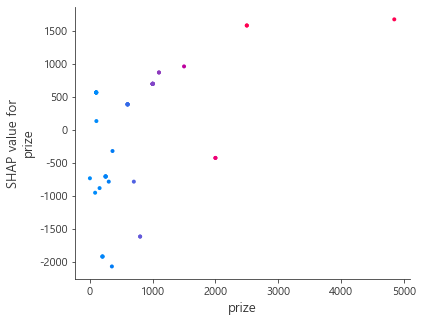

세션


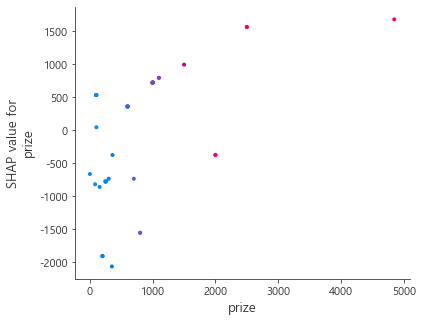

신규방문자


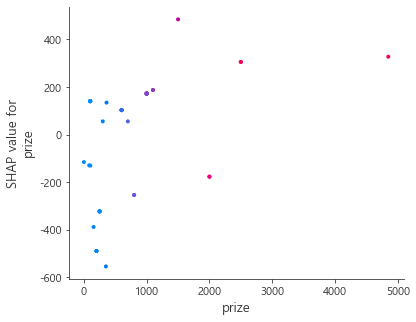

페이지뷰


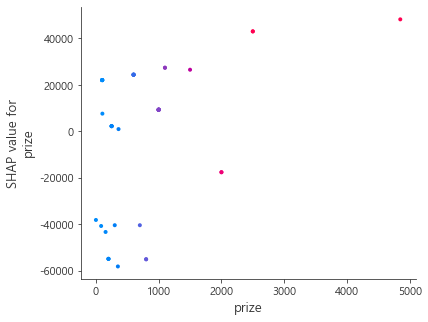

In [33]:
for target in ['사용자','세션','신규방문자','페이지뷰']:
    # input 변수 list
    input_var = ['prize']
    # 모델 객체 생성
    xgb = XGBRegressor()   # n_estimators = 300, learning_rate=0.1
    # 학습
    xgb.fit(compet_period_start2[input_var], compet_period_start2[target])   # input, output 변수

    ## 제작한 모델을 TreeExplainer 함수에 넣고, 학습한 train 데이터를 shap_values 함수에 넣기
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(compet_period_start2[input_var])

    ## dependence_plot 함수는 특정 input 변수와 target 변수와의 '관계'를 표현하는 plot을 그려주는 함수
    print(target)
    shap.dependence_plot('prize', shap_values , compet_period_start2[input_var] )  # 특정 변수, shape_value, input변수

- **target 변수에 음(-)의 영향을 주는 대회들은 상금 1000만원 이하에 분포함**